In [2]:
library(tidyverse)
library(repr)
library(readxl)
library(GGally)

options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [3]:
options(repr.matrix.max.rows = 16)

fb_data <- read_csv2("data/dataset_fb.csv")
colnames(fb_data) <- c("page_likes", "type", "category", "post_month", "post_weekday", "post_hour", "paid", "reach", 
      "impressions", "engaged_users", "post_consumers", "post_consumptions", "impressions_by_people_that_liked_page", 
      "reach_by_people_that_like_page", "people_liked_page_and_engaged", "comments", "likes", "shares", "interactions")
fb_data_used <- fb_data %>% 
        select(-post_month, -post_weekday, -post_hour) %>% 
        mutate(type = as_factor(type)) %>% 
        mutate(category = as_factor(type)) %>% 
        mutate(type = as_factor(type)) %>% 
        mutate(comments_percent = comments / interactions) %>% 
        mutate(likes_percent = likes / interactions) %>% 
        mutate(shares_percent = shares / interactions) %>% 
        mutate(impressions_by_people_that_liked_page_percent = impressions_by_people_that_liked_page / page_likes) %>% 
        mutate(reach_by_people_that_like_page_percent = reach_by_people_that_like_page / page_likes)
    

fb_data_used

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  `Page total likes` = col_double(),
  Type = col_character(),
  Category = col_double(),
  `Post Month` = col_double(),
  `Post Weekday` = col_double(),
  `Post Hour` = col_double(),
  Paid = col_double(),
  `Lifetime Post Total Reach` = col_double(),
  `Lifetime Post Total Impressions` = col_double(),
  `Lifetime Engaged Users` = col_double(),
  `Lifetime Post Consumers` = col_double(),
  `Lifetime Post Consumptions` = col_double(),
  `Lifetime Post Impressions by people who have liked your Page` = col_double(),
  `Lifetime Post reach by people who like your Page` = col_double(),
  `Lifetime People who have liked your Page and engaged with your post` = col_double(),
  comment = col_double(),
  like = col_double(),
  share = col_double(),
  `Total Interactions` = col_double()
)



page_likes,type,category,paid,reach,impressions,engaged_users,post_consumers,post_consumptions,impressions_by_people_that_liked_page,⋯,people_liked_page_and_engaged,comments,likes,shares,interactions,comments_percent,likes_percent,shares_percent,impressions_by_people_that_liked_page_percent,reach_by_people_that_like_page_percent
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
139441,Photo,Photo,0,2752,5091,178,109,159,3078,⋯,119,4,79,17,100,0.040000000,0.7900000,0.17000000,0.02207385,0.01176125
139441,Status,Status,0,10460,19057,1457,1361,1674,11710,⋯,1108,5,130,29,164,0.030487805,0.7926829,0.17682927,0.08397817,0.04383216
139441,Photo,Photo,0,2413,4373,177,113,154,2812,⋯,132,0,66,14,80,0.000000000,0.8250000,0.17500000,0.02016624,0.01077875
139441,Photo,Photo,1,50128,87991,2211,790,1119,61027,⋯,1386,58,1572,147,1777,0.032639280,0.8846370,0.08272369,0.43765464,0.22983197
139441,Photo,Photo,0,7244,13594,671,410,580,6228,⋯,396,19,325,49,393,0.048346056,0.8269720,0.12468193,0.04466405,0.02294877
139441,Status,Status,0,10472,20849,1191,1073,1389,16034,⋯,1016,1,152,33,186,0.005376344,0.8172043,0.17741935,0.11498770,0.05631055
139441,Photo,Photo,1,11692,19479,481,265,364,15432,⋯,379,3,249,27,279,0.010752688,0.8924731,0.09677419,0.11067046,0.06689568
139441,Photo,Photo,1,13720,24137,537,232,305,19728,⋯,422,0,325,14,339,0.000000000,0.9587021,0.04129794,0.14147919,0.07928801
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


In [4]:
summary(fb_data_used)

   page_likes         type       category        paid            reach       
 Min.   : 81370   Photo :426   Photo :426   Min.   :0.0000   Min.   :   238  
 1st Qu.:112676   Status: 45   Status: 45   1st Qu.:0.0000   1st Qu.:  3315  
 Median :129600   Link  : 22   Link  : 22   Median :0.0000   Median :  5281  
 Mean   :123194   Video :  7   Video :  7   Mean   :0.2786   Mean   : 13903  
 3rd Qu.:136393                             3rd Qu.:1.0000   3rd Qu.: 13168  
 Max.   :139441                             Max.   :1.0000   Max.   :180480  
                                            NA's   :1                        
  impressions      engaged_users     post_consumers    post_consumptions
 Min.   :    570   Min.   :    9.0   Min.   :    9.0   Min.   :    9.0  
 1st Qu.:   5695   1st Qu.:  393.8   1st Qu.:  332.5   1st Qu.:  509.2  
 Median :   9051   Median :  625.5   Median :  551.5   Median :  851.0  
 Mean   :  29586   Mean   :  920.3   Mean   :  798.8   Mean   : 1415.1  
 3rd Qu.:  

Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removing 1 row that contained a missing value”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


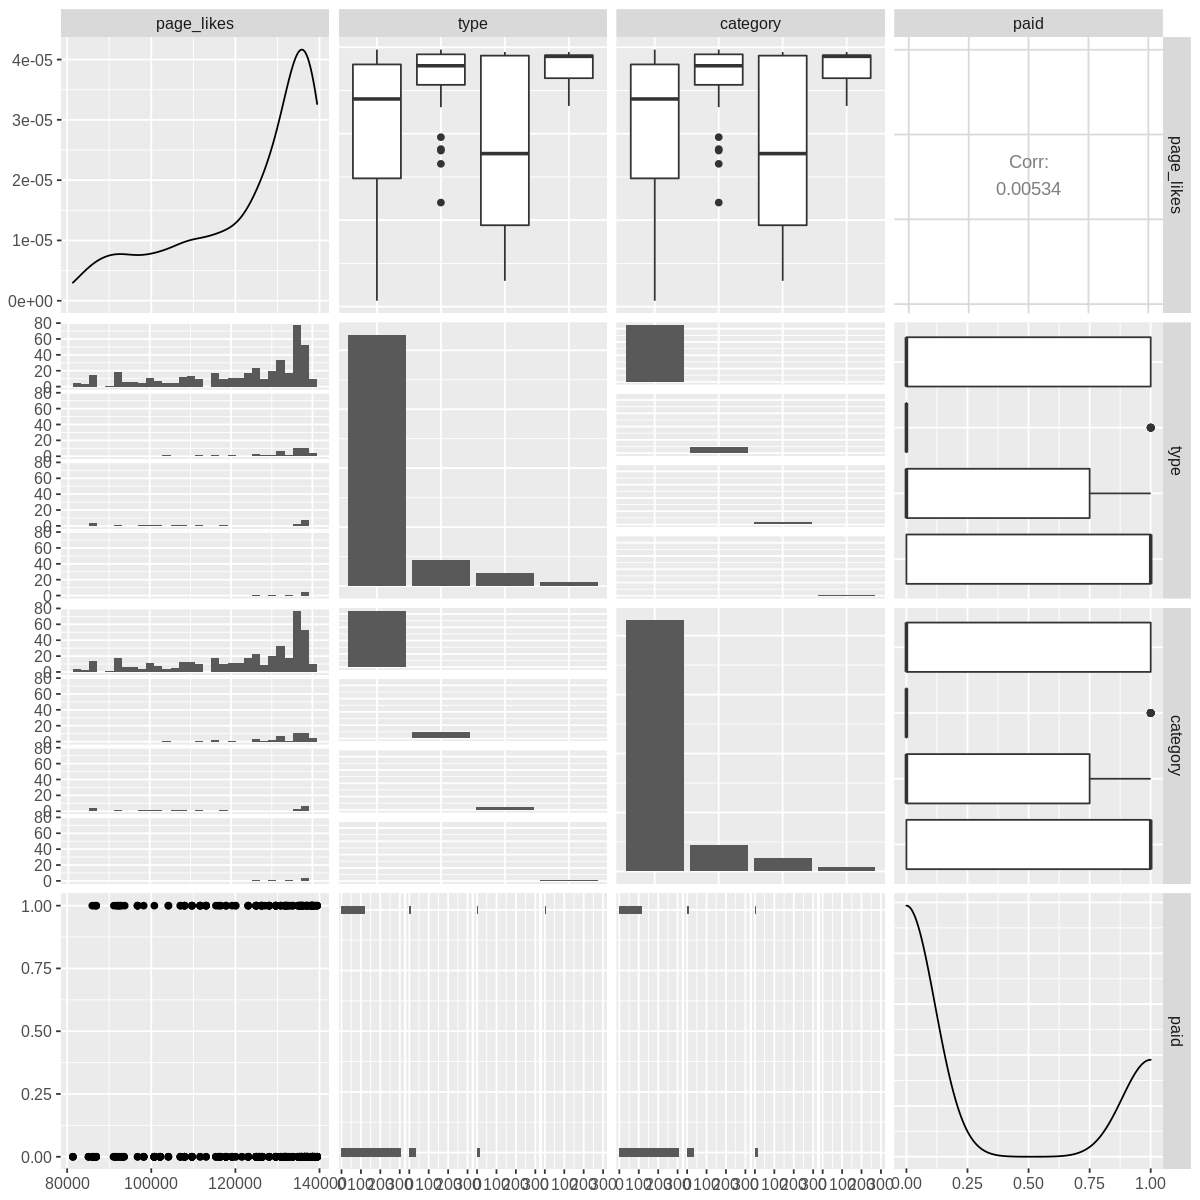

In [5]:
options(repr.plot.width = 10, repr.plot.height = 10)

fb_plot <- select(fb_data_used, c(1,2,3,4)) %>% 
    ggpairs() +
    theme(text = element_text(size=12))

fb_plot